# Vetorização de Textos (e outras coisas) com Python

## Quem Sou eu?

![André Claudino](https://media.licdn.com/dms/image/C4D03AQFMxo0XHj2DPw/profile-displayphoto-shrink_200_200/0?e=1527044400&v=alpha&t=ZeikiWNWqU6yVCMLlWy_Mbd2bd-iAdWM7KTcARPkstM)

* Físico
* PhD Física Computacional
* Inteligência Artificial e Sistemas Distribuídos
* Adoro falar de IA por aí

Como Me Achar:
* https://www.linkedin.com/in/andreclaudino/
* http://t.me/aclaudino
* https://github.com/andreclaudino
* http://t.me/iaBrasil
* claudino@d2x.com.br

## Aproximações de posto K para Lena

In [1]:
%reload_ext dotmagic

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd

from sympy.matrices import Matrix
from sympy import init_printing
from sympy import latex
import math

import pandas as pd

init_printing()

def printm(m):
    display(Matrix(m))
    
def printl(m):
    print(latex(Matrix(np.array(m*100, dtype=int)/100)))

In [3]:
# Gera uma amostra de posto k
def gen_rank_k(k, U, W, Vt):
    temp = np.matmul(U[:,:k], np.diag(W[:k]))
    return np.matmul(temp, Vt[:k, :])

def gen_ranked_k(k, U, W, Vt):
    return U[:,:k], np.diag(W[:k]), Vt[:k, :]

In [4]:
lena = plt.imread('lena.bmp')
lena.shape

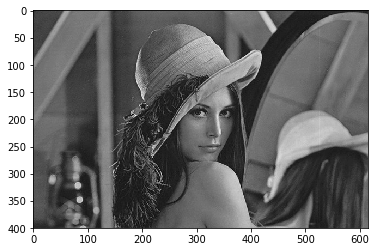

In [5]:
plt.imshow(lena, cmap="gray")

In [6]:
print(lena)

[[ 54  53  56 ...  49  49  43]
 [ 52  53  57 ...  42  40  38]
 [ 49  55  58 ...  39  40  42]
 ...
 [ 44  43  42 ... 112 114 113]
 [ 44  43  44 ... 110 111 112]
 [ 46  46  45 ... 109 109 111]]


In [7]:
print(lena.shape)

(400, 615)


Decompomos a matriz em três outras:
![](https://latex.codecogs.com/gif.download?%5Cdpi%7B300%7D%20%5Chuge%20L%20%3D%20U%20W%20V%5ET)

* $U$ é uma matriz ortogonal
* $V$ é outra matriz ortogonal
* $W$ é diagonal

In [8]:
lU, lW, lVt = svd(lena, full_matrices=True)

In [9]:
print(lU.shape)
print(lW.shape)
print(lVt.shape)

(400, 400)
(400,)
(615, 615)


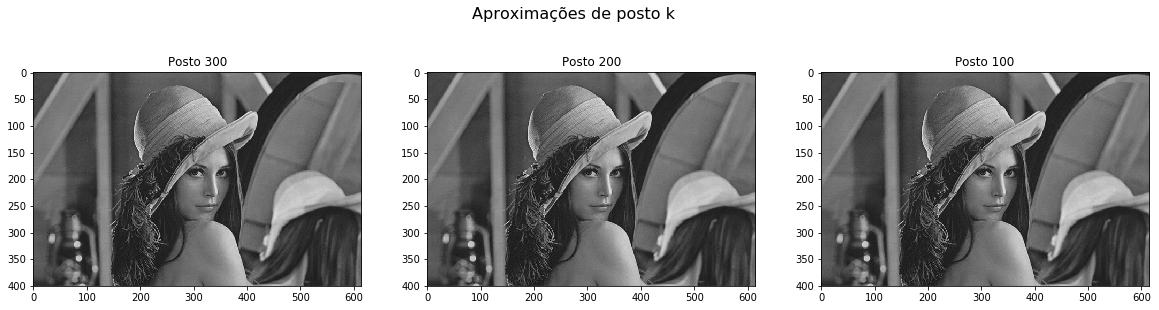

In [10]:
fig=plt.figure(figsize=(20, 5))

plt.suptitle('Aproximações de posto k', fontsize=16)

rows = 1
columns =  3

for i in range(0, rows*columns):
    plot = fig.add_subplot(rows, columns, i+1)
    plot.set_title("Posto %d" % (300-100*i))
    plt.imshow(gen_rank_k(300-100*1, lU, lW, lVt), cmap='gray', interpolation=None)
    ax = plt.axes
plt.show()

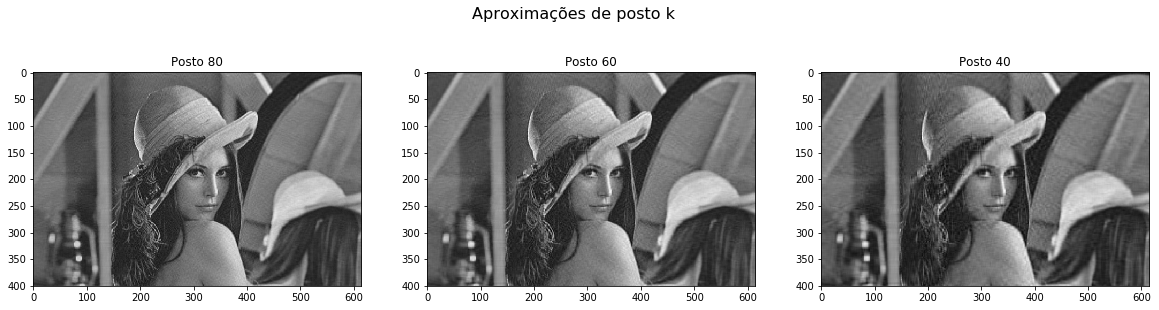

In [11]:
fig=plt.figure(figsize=(20, 5))

plt.suptitle('Aproximações de posto k', fontsize=16)

rows = 1
columns =  3

for i in range(1, rows*columns+1):
    plot = fig.add_subplot(rows, columns, i)
    plot.set_title("Posto %d" % (100-20*i))
    plt.imshow(gen_rank_k(100-20*i, lU, lW, lVt), cmap='gray', interpolation=None)
    ax = plt.axes
plt.show()

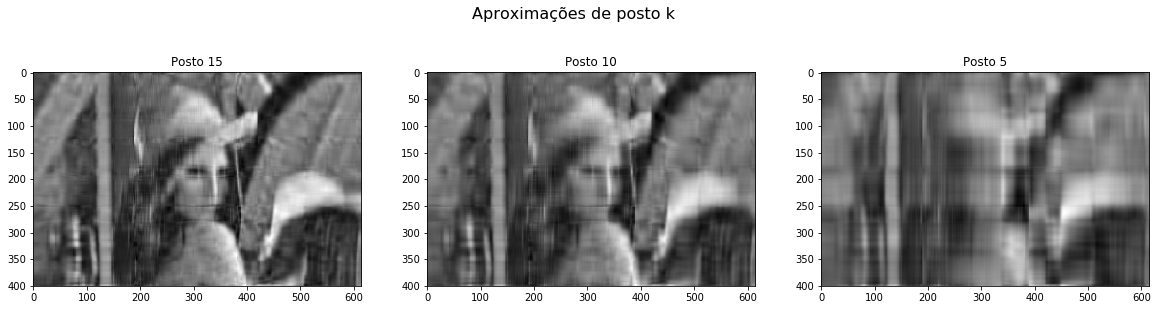

In [12]:
fig=plt.figure(figsize=(20, 5))

plt.suptitle('Aproximações de posto k', fontsize=16)

rows = 1
columns = 3

for i in range(1, rows*columns+1):
    plot = fig.add_subplot(rows, columns, i)
    plot.set_title("Posto %d" % (20-5*i))
    plt.imshow(gen_rank_k(20-5*i, lU, lW, lVt), cmap='gray', interpolation=None)
    ax = plt.axes
plt.show()

![](https://latex.codecogs.com/gif.download?%5Cdpi%7B300%7D%20%5Chuge%20L_%7B%28m%20%5Ctimes%20n%29%7D%20%3D%20U_%7B%28m%20%5Ctimes%20k%29%7D%20W_%7B%28k%20%5Ctimes%20k%29%7D%20V%5ET_%7B%28k%20%5Ctimes%20n%29%7D)

## E o texto?

Documentos

* m1: **Rock** and **Roll Music** in the 1960’s
* m2: **Recipe** for a **Drum Roll**, a **Demonstration** of Techniques
* m3: **Drum** and Bass **Composition**
* m4: A Perspective of **Rock Music** in the 90’s
* m5: **Music** and **Composition** of Popular Bands
* b1: How to make **Bread** and **Rolls**, a **Demonstration**
* b2: **Ingredients** for Crescent **Roll Dough**
* b3: A **Recipe** for Sour**dough Bread**
* b4: A Quick **Recipe** for Pizza **Dough** with Natural **Ingredients**

* Cada frase é chamada de *Documento*
* Cada palavra é chamada de *termo*

Criamos a matriz termo-documento:
* colunas são documentos e linhas termos
* entradas são o número de vezes que a palavra ocorre

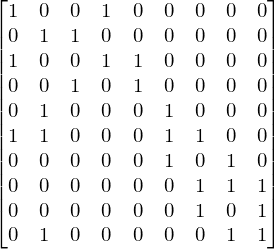

In [13]:
S = np.array([
    [1,0,0,1,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0],
    [1,0,0,1,1,0,0,0,0],
    [0,0,1,0,1,0,0,0,0],
    [0,1,0,0,0,1,0,0,0],
    [1,1,0,0,0,1,1,0,0],
    [0,0,0,0,0,1,0,1,0],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,0,1],
    [0,1,0,0,0,0,0,1,1]
   ])

printm(S)

![documento](documentos.png) ![termo-documento](termo-documento.png) 

In [14]:
U, W, Vt = svd(S, full_matrices=True)

* $U$ é a representação dos termos
* $V$ é a representação dos documentos
* $W$ é o operador que reúne ambos os espaços vetoriais

In [15]:
labels = ["Rock", "Drum", "Music",
          "Composition", "Demonstration", "Roll",
          "Bread", "Dough", "Ingredients", "Recipe"]

termos = pd.DataFrame(U)
termos["LABEL"] = labels
termos.set_index(["LABEL"])

,0,1,2,3,4,5,6,7,8,9
LABEL,,,,,,,,,,
Rock,-0.133901,0.459144,-0.284549,0.164211,0.111619,0.334430,-0.445994,-0.382478,-0.262338,3.535534e-01
Drum,-0.208697,0.085806,0.359496,-0.519017,-0.198588,0.244708,-0.472215,-0.134453,0.291690,-3.535534e-01
Music,-0.159200,0.616889,-0.387704,-0.102370,0.197628,0.001031,0.369189,0.101895,0.350098,-3.535534e-01
Composition,-0.056406,0.214755,-0.014829,-0.675880,-0.021830,-0.505873,0.070537,0.018592,-0.327048,3.535534e-01
Demonstration,-0.309880,0.076585,0.491536,0.105364,0.064188,0.009702,0.442211,-0.483637,0.294500,3.535534e-01
Roll,-0.554948,0.268573,0.234127,0.355711,-0.390350,-0.164520,-0.086969,0.466027,-0.185393,-5.551115e-17
Bread,-0.262592,-0.093211,0.134255,0.166830,0.642846,-0.462199,-0.263660,-0.185110,-0.144359,-3.535534e-01
Dough,-0.407926,-0.371001,-0.443291,-0.045329,0.015154,-0.162476,-0.234074,0.107305,0.528640,3.535534e-01
Ingredients,-0.277624,-0.230001,-0.357181,0.002923,-0.472755,-0.107757,0.199366,-0.522550,-0.263674,-3.535534e-01


In [16]:
labels = ["m1", "m2", "m3", "m4", "m5", "b1", "b2", "b3", "b4"]
termos = pd.DataFrame(Vt.T)
termos["LABEL"] = labels
termos.set_index(["LABEL"])

,0,1,2,3,4,5,6,7,8
LABEL,,,,,,,,,
m1,-0.290497,0.585605,-0.221790,0.244380,-0.056728,0.138916,-0.222987,0.371820,-0.503266
m2,-0.518440,0.066118,0.535672,-0.187467,-0.129741,0.513359,0.200088,0.165248,0.238847
m3,-0.090810,0.130901,0.174479,-0.699335,-0.154174,-0.212236,-0.546907,-0.232306,-0.182259
m4,-0.100401,0.468635,-0.340311,0.036194,0.216307,0.272613,-0.104574,-0.562579,0.452373
m5,-0.073855,0.362199,-0.203772,-0.455485,0.122964,-0.410260,0.598714,0.241579,0.118812
b1,-0.386195,0.109728,0.435311,0.367493,0.221508,-0.501420,0.124695,-0.406460,-0.181714
b2,-0.424930,-0.144780,-0.286698,0.183368,-0.593110,-0.353303,-0.165670,0.101820,0.410167
b3,-0.380391,-0.323750,-0.170103,-0.082444,0.697548,-0.067334,-0.318341,0.314137,0.153708
b4,-0.385540,-0.383325,-0.418880,-0.178373,-0.082773,0.220704,0.312095,-0.362440,-0.461320


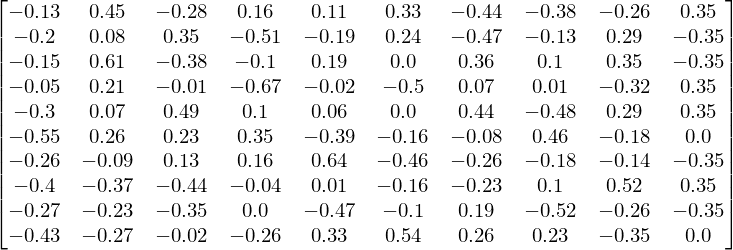

In [17]:
# Palavras
printm(np.array(U*100, dtype=int)/100)

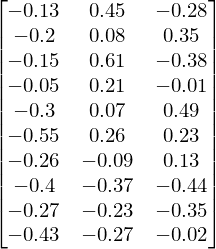

In [18]:
# Palavras
printm(np.array(U[:, :3]*100, dtype=int)/100)

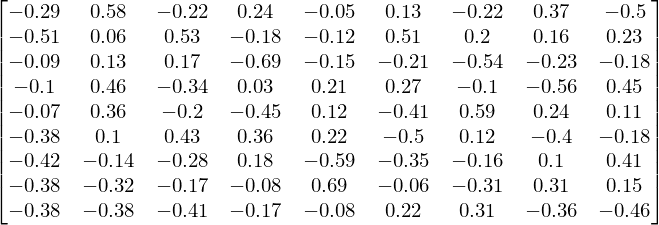

In [19]:
# documentos
printm(np.array(Vt.T*100, dtype=int)/100)

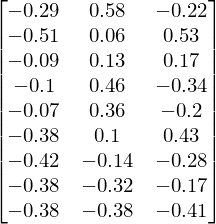

In [20]:
# documentos
printm(np.array(Vt.T[:,:3]*100, dtype=int)/100)

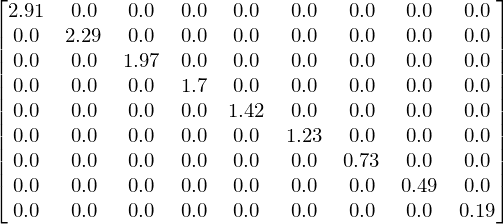

In [21]:
# Valores singulares
printm(np.array(np.diag(W)*100, dtype=int)/100)

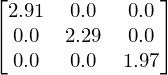

In [22]:
# Valores singulares
printm(np.array(np.diag(W)[:3, :3]*100, dtype=int)/100)

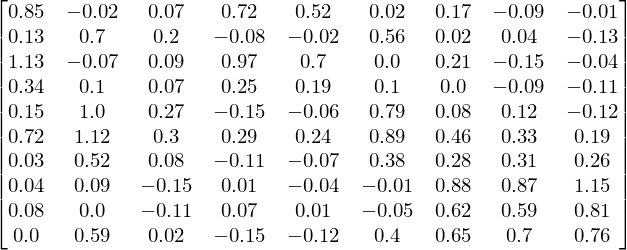

In [23]:
printm(np.array(100*gen_rank_k(3, U, W, Vt), dtype=int)/100)

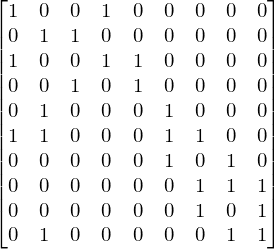

In [24]:
printm(S)

Multiplica reduz as dimensões da matrix $W$ para $k$, e de $U$ e $V^T$ para compatibilizar.

```Python
def gen_rank_k(k, U, W, Vt):
    temp = np.matmul(U[:,:k], np.diag(W[:k]))
    return np.matmul(temp, Vt[:k, :])
```

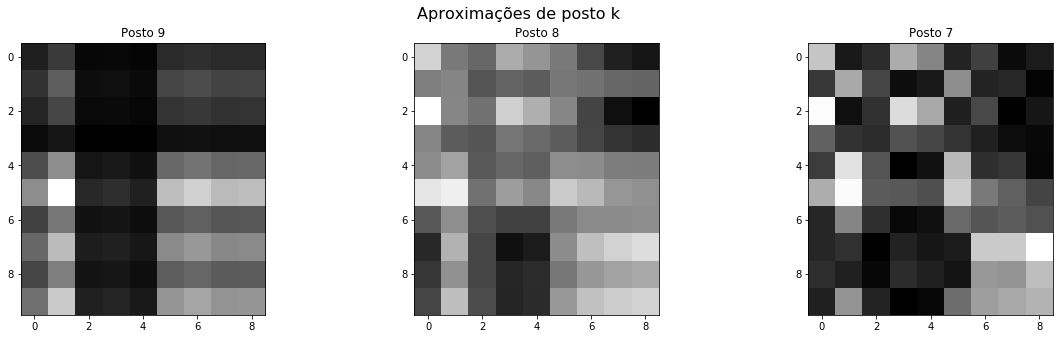

In [25]:
fig=plt.figure(figsize=(20, 5))

columns = 3
rows = 1

plt.suptitle('Aproximações de posto k', fontsize=16)

for i in range(columns*rows, 0, -1):
    plot = fig.add_subplot(rows, columns, i)
    plot.set_title("Posto %d" % (10-i))
    plt.imshow(gen_rank_k(i, U, W, Vt), cmap='gray', interpolation=None)
plt.show()

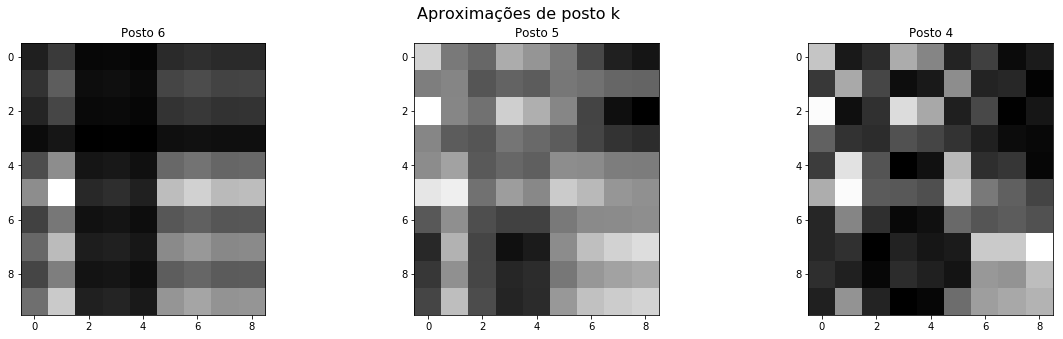

In [26]:
fig=plt.figure(figsize=(20, 5))

columns = 3
rows = 1

plt.suptitle('Aproximações de posto k', fontsize=16)

for i in range(columns*rows, 0, -1):
    plot = fig.add_subplot(rows, columns, i)
    plot.set_title("Posto %d" % (7-i))
    plt.imshow(gen_rank_k(i, U, W, Vt), cmap='gray', interpolation=None)
plt.show()

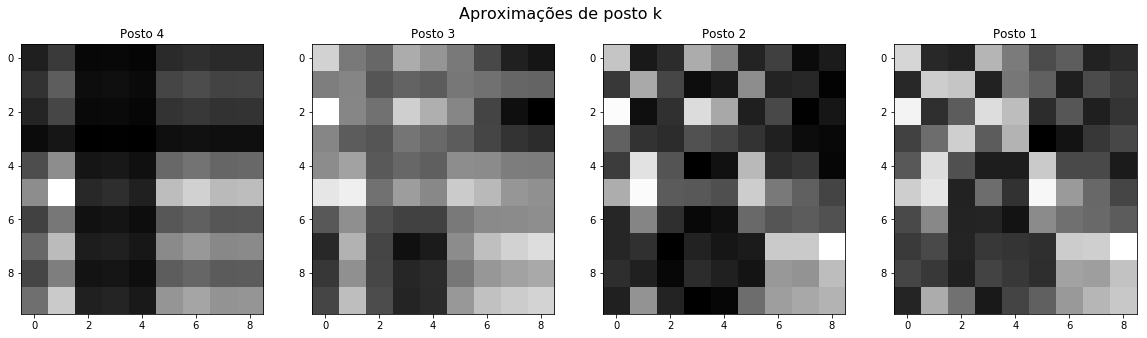

In [27]:
fig=plt.figure(figsize=(20, 5))

columns = 4
rows = 1

plt.suptitle('Aproximações de posto k', fontsize=16)

for i in range(columns*rows, 0, -1):
    plot = fig.add_subplot(rows, columns, i)
    plot.set_title("Posto %d" % (5-i))
    plt.imshow(gen_rank_k(i, U, W, Vt), cmap='gray', interpolation=None)
plt.show()

In [33]:
def plotv(M, labels):
    rows,cols = M.T.shape

    #maxes = 1.1*np.amax(abs(M), axis = 0)
    colors = ['b','r','k']
    fig=plt.figure(figsize=(8, 8))
    fig.suptitle('Distribuição vetorizada das palavras', fontsize=20)

    ax = fig.add_subplot(111)

    ax.set_xlabel('Coordenada 1', fontsize=15)
    ax.set_ylabel('Coordenada 2', fontsize=15)

    for i,l in enumerate(range(0,len(labels))):
        ax.text(M[i,0], M[i,1], labels[i], style='italic', fontsize=20,
            bbox={'facecolor':'white', 'alpha':0, 'pad':0.5})
        plt.plot(M[i,0], M[i,1],'ok')

    plt.axis('equal')
    plt.grid(b=True, which='major')
    plt.show()

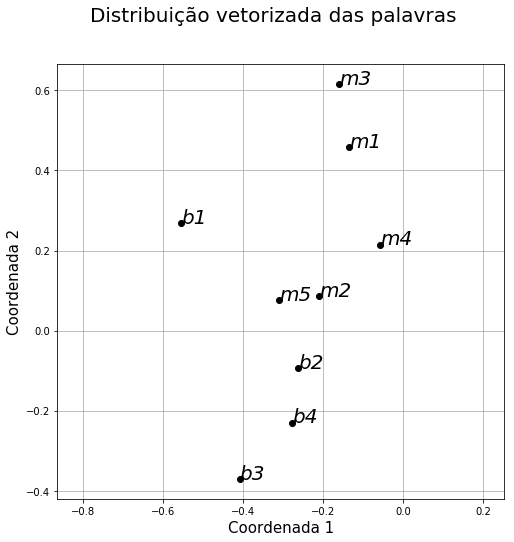

In [34]:
plotv(np.vstack(U), labels)

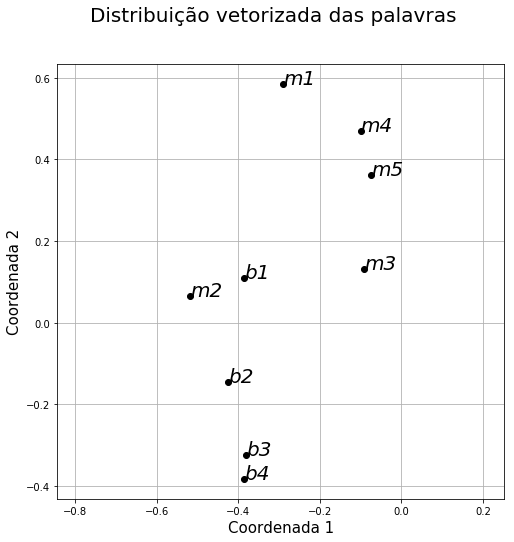

In [35]:
V = Vt.transpose()
plotv(np.vstack(V), labels)

## Recaptulando:

* Textos são organizados na matriz *termo-documento*, que é esparsa e não representa os espaços separadamente
* Geramos um espaço de representação para termos e outro para documentos a partir de SVD
* A representação densa do espaço vetorial permite encontrar relacionamento semântico entre termos de um mesmo documento
* A Decomposição em valores singulares (SVD) permite representar elementos de forma aproximada num espaço de base menor

# Obrigado